In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats

In [ ]:
data_folder = "." # change this to the folder where the data is stored
filename = "Zhuang-ABCA-1-raw_1.058_wMeta_wAnnotations_KW.h5ad" # this is from the Allen Brain Atlas at z-slice 1.058
kw_data = sc.read_h5ad(f"{data_folder}/{filename}")

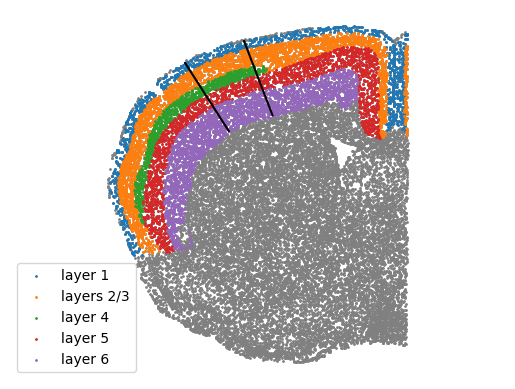

In [ ]:
layers = {'layer 1': kw_data.obs[kw_data.obs["cell_label"].isin(kw_data.obsm["atlas"][kw_data.obsm["atlas"]["layer 1"] == True].index)],
          'layers 2/3': kw_data.obs[kw_data.obs["cell_label"].isin(kw_data.obsm["atlas"][kw_data.obsm["atlas"]["layer 2/3"] == True].index)],
          'layer 4': kw_data.obs[kw_data.obs["cell_label"].isin(kw_data.obsm["atlas"][kw_data.obsm["atlas"]["layer 4"] == True].index)],
          'layer 5': kw_data.obs[kw_data.obs["cell_label"].isin(kw_data.obsm["atlas"][kw_data.obsm["atlas"]["layer 5"] == True].index)],
          'layer 6': kw_data.obs[kw_data.obs["cell_label"].isin(kw_data.obsm["atlas"][kw_data.obsm["atlas"]["layer 6"] == True].index)]
         }
plt.scatter(kw_data.obs["x"], -kw_data.obs["y"], s = 1, c = "grey")
for i in layers.items():
    plt.scatter(i[1]["x"], -i[1]["y"], label = i[0], s = 1)
leftBorder = [[3.163749883786499, 2.481411543681871], [-2.984381204079216, -1.920129826905108]]
rightBorder = [[3.846496599697873, 3.402327776942732], [-2.7383452452886643, -1.5781737284616928]]
plt.plot(*leftBorder, c = 'black')
plt.plot(*rightBorder, c = 'black')
plt.axis('equal')
plt.axis('off')
plt.legend()
# plt.savefig("./layers.png", dpi=800)

(1.0766990912359276,
 6.18573142307463,
 -5.1022294693760255,
 -1.1709507834147357)

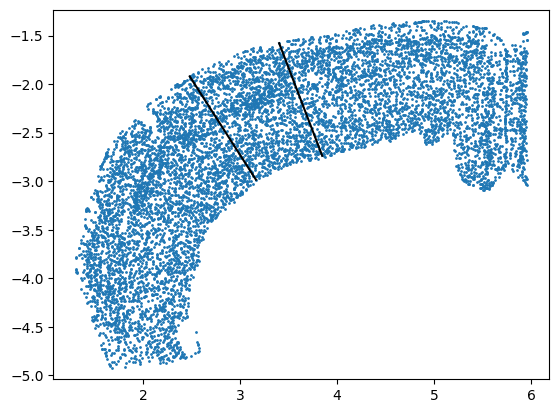

In [ ]:
layersPD = pd.concat(layers.values())
isocortex = kw_data.obs[kw_data.obs["cell_label"].isin(kw_data.obsm["atlas"][kw_data.obsm["atlas"]["Isocortex"] == True].index)]
excess = isocortex[~isocortex["cell_label"].isin(layersPD["cell_label"])]
plt.scatter(layersPD['x'], -layersPD['y'], s = 1)
leftBorder = [[3.163749883786499, 2.481411543681871], [-2.984381204079216, -1.920129826905108]]
rightBorder = [[3.846496599697873, 3.402327776942732], [-2.7383452452886643, -1.5781737284616928]]
plt.plot(*leftBorder, c = 'black')
plt.plot(*rightBorder, c = 'black')
plt.axis('equal')
# plt.savefig("./column_selection.png", dpi=500)

layer 1: 149
layers 2/3: 331
layer 4: 275
layer 5: 190
layer 6: 441
total: 1386


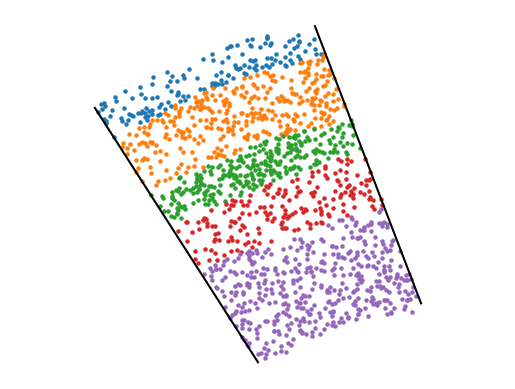

In [ ]:
def leftFunc(x):
    x1, x2, y1, y2 = leftBorder[0][0], leftBorder[0][1], leftBorder[1][0], leftBorder[1][1]
    return (y1 - y2) / (x1 - x2) * (x - x1) + y1

def rightFunc(x):
    x1, x2, y1, y2 = rightBorder[0][0], rightBorder[0][1], rightBorder[1][0], rightBorder[1][1]
    return (y1 - y2) / (x1 - x2) * (x - x1) + y1

totalCount = 0
for pair in layers.items():
    name, cells = pair
    sliceI = cells[(-cells['y'] > leftFunc(cells['x'])) & (-cells['y'] < rightFunc(cells['x']))]
    print(name + ":", len(sliceI))
    plt.scatter(sliceI['x'], -sliceI['y'], s = 5)
    totalCount += len(sliceI)
print("total:", totalCount)
leftBorder = [[3.163749883786499, 2.481411543681871], [-2.984381204079216, -1.920129826905108]]
rightBorder = [[3.846496599697873, 3.402327776942732], [-2.7383452452886643, -1.5781737284616928]]
plt.plot(*leftBorder, c = 'black')
plt.plot(*rightBorder, c = 'black')
plt.axis('equal')
plt.axis('off')
# plt.savefig("./column_layers.svg", dpi=500)